In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print( x_train.shape )

model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.9049 - loss: 0.3158 - val_accuracy: 0.9868 - val_loss: 0.0490
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.9850 - loss: 0.0475 - val_accuracy: 0.9852 - val_loss: 0.0502
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.9904 - loss: 0.0294 - val_accuracy: 0.9859 - val_loss: 0.0495
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 41ms/step - accuracy: 0.9936 - loss: 0.0213 - val_accuracy: 0.9909 - val_loss: 0.0360
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.9950 - loss: 0.0155 - val_accuracy: 0.9893 - val_loss: 0.0380
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9875 - loss: 0.0408


[0.02971913479268551, 0.9902999997138977]

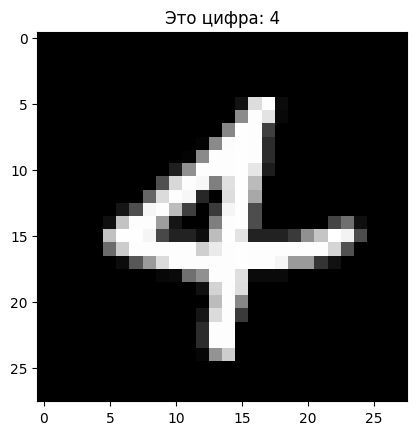

In [ ]:
import matplotlib.pyplot as plt
i=150
plt.imshow(x_train[i].reshape(28,28), cmap='gray')
plt.title(f"Это цифра: {y_train[i]}")
plt.show()


In [ ]:
# оценка
print("Evaluate on test:")
res = model.evaluate(x_test, y_test_cat)
print("Test loss, Test accuracy =", res)

# пример предсказания
probs = model.predict(x_test[:5])
preds = np.argmax(probs, axis=1)
print(np.array2string(probs, formatter={'float_kind':lambda x: "{0:.3f}".format(x)}))
print("preds:", preds)
print("true: ", y_test[:5])

Evaluate on test:
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9875 - loss: 0.0408
Test loss, Test accuracy = [0.02971913479268551, 0.9902999997138977]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000]
 [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000]]
preds: [7 2 1 0 4]
true:  [7 2 1 0 4]


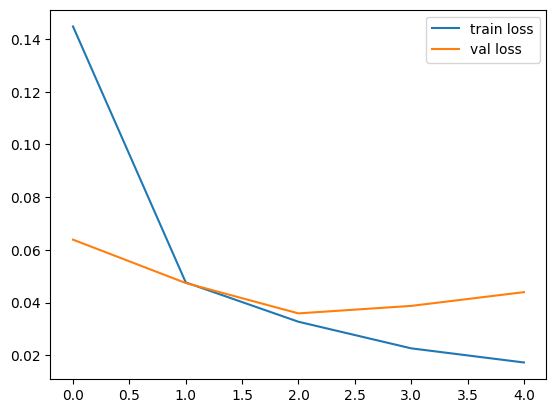

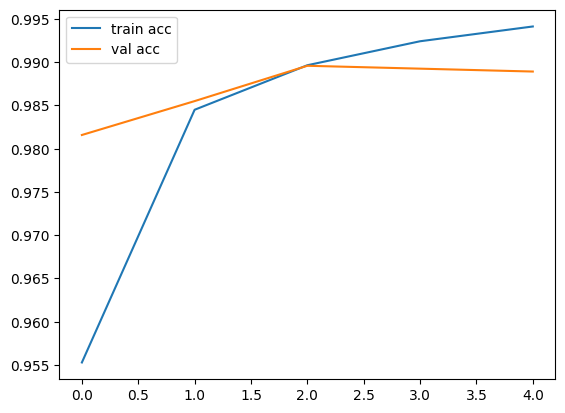

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(); plt.show()

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend(); plt.show()